In [1]:
#packages used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def convert_to_float(column):
    new=[]
    for f in range(len(column)):
        new.append(float(str(column[f]).replace("$","").replace(",","").replace("%","")))
    return new    


def to_prop(column):
    new=[]
    for j in range(len(column)):
        new.append(float(str(column[j]).replace("$","").replace(",","").replace("%",""))/100)
    return new


def df_str_df_float(df):
    cnty_names=df['County']
    df=df.drop('County',axis=1).apply(convert_to_float,axis=0)
    df['County']=cnty_names
    return df


def df_perc_df_prop(df):
    cnty_names=df['County']
    df=df.drop('County',axis=1).apply(to_prop,axis=0)
    df['County']=cnty_names
    return df

def standardize_columns(data):

    norm_df = pd.DataFrame() 
    
    for i in data.columns:
        column=data[i]
        
        std=np.std(column)
        avg=np.mean(column)

        norm_df[i]=(column-avg)/std
        
    
    return norm_df

# Part 1: Data Cleaning, Filtering and Parsing

### 1a. California DMV Vechicle Registration by Type (y variable)

#### Problems/ things done:

<ol>
  <li>Select columns Battery Electric, Plug-in Hybrid, and Grand Total.</li>

  <li>Turn columns into floats by turning 100,003 into 100003.0</li>
  
  <li>Get combined number of electric vehicles by adding  Plug in Hybrid and Battery Electric</li>
  
   <li>Make a new dataframe with columns 'Total EV's', 'Total Registered Vehicles', and 'County'.</li>
   
   <li>Remove hidden white space</li>

</ol>

In [3]:
ev_raw=pd.read_csv('California_DMV_EV.csv')
ev_raw.head()

,County,Battery Electric,Diesel,Diesel Hybrid,Ethanol,Fuel Cell,Gasoline,Hybrid Gas,Plug-in Hybrid,Butane,natural gas,Methanol,Methane,Natural Gas,Propane,Grand Total
0,Alameda,"14,904","38,103",36,"53,198",170,"1,048,019","62,088","10,342",1,91,195,0,"1,173",56,"1,228,376"
1,Alpine,2,177,0,92,0,"1,570",30,1,0,0,0,0,0,0,"1,872"
2,Amador,51,"4,319",0,"2,534",0,"36,766",753,58,0,0,7,0,12,13,"44,513"
3,Butte,238,"13,287",0,"11,289",0,"153,132","4,107",245,0,15,48,0,49,13,"182,423"
4,Calaveras,75,"6,109",0,"3,242",0,"47,294",990,81,0,0,14,0,8,3,"57,816"


In [4]:
y_data=ev_raw.loc[:,['County ','Battery Electric ','Plug-in Hybrid ','Grand Total ']]

def to_float(column):
    new=[]
    for k in range(len(column)):
        new.append(float(column[k].replace(",","")))
    return new

battery=to_float(np.array(y_data['Battery Electric ']))
hybrid=to_float(np.array(y_data['Plug-in Hybrid ']))

total=np.array(battery)+np.array(hybrid)

total_evs=pd.DataFrame()
total_evs['Total Vehicles']=to_float(y_data['Grand Total '])
total_evs['EV']=total

<h3 align="center">1a. Output</h3>

In [5]:
total_evs['County']=y_data['County ']
edited_county_names=[]
for county_string in total_evs['County']:
    edited_county_names.append(county_string[0:-1])
total_evs['County']=edited_county_names

In [6]:
total_evs.head()

,Total Vehicles,EV,County
0,1228376.0,25246.0,Alameda
1,1872.0,3.0,Alpine
2,44513.0,109.0,Amador
3,182423.0,483.0,Butte
4,57816.0,156.0,Calaveras


## 1b. California County Charging Station

#### Problems/ things done:

<ol>
  <li>Fix spelling/capitalize/add space to the City column for our charging station data. (Sanfracisco --> San Francisco)</li>

  <li>Map city to a county by using a dataframe that has all cities and associated counties in California</li>
  
  <li>Create a grouped dataframe that has total count of charging stations by county</li>
  
   <li>Include a list of cities that have no link to county, and get a count of how much data was 'lost'.</li>
</ol>

In [7]:
stations=pd.read_csv('charging_stations.csv') #raw data
stations.head(2)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code
0,ELEC,LADWP - Truesdale Center,11791 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,...,J1772,US,NaN,NaN,NaN,Privé - Réservé au gouvernement,NaN,private,GOVERNMENT,NaN
1,ELEC,Southern California Edison - Rosemead Office B...,2244 Walnut Grove Ave,NaN,Rosemead,CA,91770,NaN,NaN,E,...,J1772 NEMA520,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN


In [8]:
cnty=pd.read_csv('county_city.csv').drop(['Type','Land area[1]',
                                          'Incorporated[7]',
                                          'Population (2010)[1][8][9]',
                                         'Land area[1].1'],axis=1).drop(0,axis=0)

cnty.head(5)
#this has the link between city ane county. Contains all cities and their associated counties. Well use these two data
#frames to get a count of charging stations by county.

,Name,County
1,Adelanto,San Bernardino
2,Agoura Hills,Los Angeles
3,Alameda,Alameda
4,Albany,Alameda
5,Alhambra,Los Angeles


In [9]:
station_city=stations['City'] #pulling all cities from the station dataframe.
print(station_city[4]) #well be interating over this to get a county label from this printed city/town label

new_cities=[]
for city in station_city:
    new_cities.append((city.title().strip(',')))
#Some values are not capitlized or have commas. This undues human error

Los Angeles


In [10]:
county_names=[] #end result is a list of the associated county names


for i in range(len(new_cities)):
    city=stations['City'][i]  #select the city string
    
    
    result=cnty[ cnty['Name'] == city] #link it to the dataframe where we know cities to counties
    
    
    if result.shape[0]==1: #if we get a result, get the county label and append it 
        county_found=np.array(result['County'])[0]

        county_names.append(county_found)
        
        
    else: #if we dont get a result (the city input has no county because it was mispelled or not written correctly,
                                    # lets append a 0 to the county name so we can keep track of the lost cities)
        county_names.append(0) 
        
print(county_names[:5] ) #end result.

[0, 'Los Angeles', 'Los Angeles', 'Los Angeles', 'Los Angeles']


In [11]:
charging_stations_filtered=pd.DataFrame()
charging_stations_filtered['County']=county_names
charging_stations_filtered['City']=stations['City']
display(charging_stations_filtered.head(5))

print('this dataframe will now be grouped by county, counts')

,County,City
0,0,Sun Valley
1,Los Angeles,Rosemead
2,Los Angeles,Los Angeles
3,Los Angeles,Los Angeles
4,Los Angeles,Los Angeles


this dataframe will now be grouped by county, counts


In [12]:
#lets make a count for how many charging stations each county has

stations_by_county=charging_stations_filtered.groupby('County').aggregate(len)  #len does the same as count
stations_by_county.rename(index=str,columns={'City':'Charging Stations'},inplace=True)
display(stations_by_county.head())
print(stations_by_county.shape,'This dataframe has 49 counties. Which means some 9 counties have no data, due to not having any charing stations or mispelled data')

#our data says it detected a nonzero amount of charging stations for 49 counties, which means we have 9 counties that
#essentially are 0. In addition, we lost 10% of our data due to mislabeled cities.

,Charging Stations
County,
0,469
Alameda,262
Amador,10
Butte,14
Colusa,1


(50, 1) This dataframe has 49 counties. Which means some 9 counties have no data, due to not having any charing stations or mispelled data


In [13]:
lost_data=charging_stations_filtered[charging_stations_filtered['County']==0]
display(lost_data.dropna().head())

total_amount=sum(stations_by_county['Charging Stations'])
print('The total_amount of charging stations is',total_amount,'The toal amount of lost cities is',lost_data.shape[0])
print('We lost',lost_data.shape[0]/total_amount,'of data')
#for viewing purposes to see which cities were lost. Some were written as S.F. others are neighborhoods, others are 
#names of colleges.

,County,City
0,0,Sun Valley
8,0,Wilmington
9,0,Sylmar
16,0,La Jolla
19,0,Sepulveda


The total_amount of charging stations is 5392 The toal amount of lost cities is 469
We lost 0.0869807121661721 of data


<h3 align="center">1b. Output</h3>

In [14]:
stations_by_county.head()

,Charging Stations
County,
0,469
Alameda,262
Amador,10
Butte,14
Colusa,1


### 1C. California politics by county

#### Problems/ things done:

<ol>
  <li>Removed raw number of democrats/repub etc and kept percentages</li>
    
  <li>Kept only Democratic, Republican, and Green party percentage identification</li>

  <li>Relabeled the percentage column to the correct county</li>
  
  <li>Turn all strings and percentages into floats</li>
   <li>Turn all percentages into proportions</li>
  
</ol>

In [15]:
raw_politics=pd.read_csv('county_politics.csv')       #make sure county_politics is in your directory
raw_politics.drop('Independent',axis=1,inplace=True)  #independent not seemed important
raw_politics.head()

#problem to fix: County information comes in row pairs. The first row is raw number of people and the 2nd has
#percentages. We want only percentages and we want it to be labeled by its appr county instead of 'percent'

,County,Eligible,Registered,Democratic,Republican,Green
0,Alameda,"1,088,060","853,629","479,107","96,400","6,640"
1,Percent,NaN,78.45%,56.13%,11.29%,0.78%
2,Alpine,939,724,294,202,6
3,Percent,NaN,77.10%,40.61%,27.90%,0.83%
4,Amador,"27,045","21,763","6,327","9,652",103


In [16]:
county_names=raw_politics['County']

new_county_names=[] #this will be the new labels 

for value in county_names[0::2]:    #the [0::2] only picks out even integer values in the array of county names
    new_county_names+=[value,value] #well go from ['Alameda,per,Alpine,per']--->['Alameda','Alameda','Alpine',Alpine']
    
raw_politics['County']=new_county_names  #now they are properly labeled, but we still have info we dont need

In [17]:
final_politics=raw_politics.loc[1::2,:] #this removes the values we dont need, which is the raw counts. [1::2] only 
                                        #picks out even values in the df
    
final_politics.index=np.arange(0,final_politics.shape[0])  #make the indexs start from 0,1,2,3,4...

final_politics.drop('Eligible',axis=1,inplace=True) #dont need eligible

/Users/nathancarrizales-duarte/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
county_politics=final_politics['County']
final_politics=final_politics.drop('County',axis=1).apply(convert_to_float)
final_politics['County']=county_politics

In [19]:
final_politics=df_perc_df_prop(final_politics)

<h3 align="center">1c. Output</h3>

In [20]:
final_politics.head()

,Registered,Democratic,Republican,Green,County
0,0.7845,0.5613,0.1129,0.0078,Alameda
1,0.7710,0.4061,0.2790,0.0083,Alpine
2,0.8047,0.2907,0.4435,0.0047,Amador
3,0.6750,0.3457,0.3521,0.0080,Butte
4,0.7945,0.2784,0.4163,0.0067,Calaveras


### 1d. California county statistics by US. Census

#### Problems/ things done:

<ol>
  <li>Merge together 12 dataframes, corresponding to 12 csv files, 1-11 containing 5 counties and 12 containing 3 counties </li>

  <li>Fix the column names to correspond with features</li>
  
  <li>Rename County column strings, such as 'Alameda County, California', to 'Alameda County'. </li>
  
   <li>Select a subset of features that will be used for the model</li>
      <li>Convert all percentages into proportions and convert all strings into floats</li>
</ol>

In [21]:
df1=pd.read_csv('group1.csv').iloc[:,[0,2,4,6,8,10]]
df1.head()

,Fact,"Calaveras County, California","Butte County, California","Amador County, California","Alpine County, California","Alameda County, California"
0,"Population estimates, July 1, 2017, (V2017)","45,670","229,294","38,626","1,120","1,663,190"
1,"Population estimates base, April 1, 2010, (V2...","45,578","220,002","38,091","1,175","1,510,261"
2,"Population, percent change - April 1, 2010 (es...",0.2%,4.2%,1.4%,-4.7%,10.1%
3,"Population, Census, April 1, 2010","45,578","220,000","38,091","1,175","1,510,271"
4,"Persons under 5 years, percent",4.3%,5.5%,4.1%,3.0%,5.9%


In [22]:
df2=pd.read_csv('group2.csv').iloc[:,[0,2,4,6,8,10]]
df2.head()

df3=pd.read_csv('group3.csv').iloc[:,[0,2,4,6,8,10]]
df3.head()

df4=pd.read_csv('group4.csv').iloc[:,[0,2,4,6,8,10]]
df4.head()

df5=pd.read_csv('group5.csv').iloc[:,[0,2,4,6,8,10]]
df5.head()

df6=pd.read_csv('group6.csv').iloc[:,[0,2,4,6,8,10]]
df6.head()

df7=pd.read_csv('group7.csv').iloc[:,[0,2,4,6,8,10]]
df7.head()

df8=pd.read_csv('group8.csv').iloc[:,[0,2,4,6,8,10]]
df8.head()

df9=pd.read_csv('group9.csv').iloc[:,[0,2,4,6,8,10]]
df9.head()

df10=pd.read_csv('group10.csv').iloc[:,[0,2,4,6,8,10]]
df10.head()

df11=pd.read_csv('group11.csv').iloc[:,[0,2,4,6,8,10]]
df11.head()

df12=pd.read_csv('group12.csv').iloc[:,[0,2,4,6]]
df12.head()

,Fact,"Yuba County, California","Yolo County, California","Ventura County, California"
0,"Population estimates, July 1, 2017, (V2017)","77,031","219,116","854,223"
1,"Population estimates base, April 1, 2010, (V2...","72,146","200,850","823,391"
2,"Population, percent change - April 1, 2010 (es...",6.8%,9.1%,3.7%
3,"Population, Census, April 1, 2010","72,155","200,849","823,318"
4,"Persons under 5 years, percent",7.8%,5.7%,6.0%


In [23]:
#making one big dataframe with all states
df_12=pd.merge(df1,df2,on='Fact')

df_34=pd.merge(df3,df4,on='Fact')

df_56=pd.merge(df5,df6,on='Fact')

df_78=pd.merge(df7,df8,on='Fact')

df_910=pd.merge(df9,df10,on='Fact')

df_1112=pd.merge(df11,df12,on='Fact')

df_1234=pd.merge(df_12,df_34,on='Fact')

df_5678=pd.merge(df_56,df_78,on='Fact')

df_9101112=pd.merge(df_910,df_1112,on='Fact').iloc[:50]


df_12345678=pd.merge(df_1234,df_5678,on='Fact').iloc[:50]


df_all=pd.merge(df_12345678,df_9101112,on='Fact').iloc[0:50,:].T  # transpose because i want counties on the rows

In [24]:
#fixes column labels
df_all.columns=df_all.loc['Fact']
df_all.drop("Fact",inplace=True)

df_all[df_all.columns[0]]=df_all.index  #replaces array data of numbers with strings of state names
df_all.rename(index=str, columns={df_all.columns[0]: "County"},inplace=True) #relabels it to state
df_all.head()

#Lastly, this sorts the states by name so it looks nicer, then makes alabama index 0
df_all.sort_values('County',ascending=True,inplace=True)
df_all.index=np.arange(len(df_all.index))

In [25]:
features=[0,1,4,5,6,8,9,10,11,12,13,14,15,16,18,23,25,26,28,29,30,41,42,44]
#for i in features:
#    print(df_all.columns[i])

In [26]:
us_cen_county=df_all.iloc[:,features]


fixed_county_names=[]
for i in us_cen_county['County']:
    fixed_county_names.append(i.replace('County, California','').replace('city, California','')[0:-1])

    

us_cen_county['County']=fixed_county_names

/Users/nathancarrizales-duarte/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [27]:
#fix population by removing commas
#fix percentages for demographics by removing % and turning into a proportion
#fix median gross rent by removing comma and dollar
#fix household by removing comma
#fix lang spoken at home by removing % and turning into proportion
#repeat for high school
#repeat for bach
#fix median household income
#fix person in poverty from percent to proportion
us_cen_county.columns

Index(['County', 'Population estimates base, April 1, 2010,  (V2017)',
       'Persons under 5 years, percent', 'Persons under 18 years, percent',
       'Persons 65 years and over, percent', 'White alone, percent',
       'Black or African American alone, percent',
       'American Indian and Alaska Native alone, percent',
       'Asian alone, percent',
       'Native Hawaiian and Other Pacific Islander alone, percent',
       'Two or More Races, percent', 'Hispanic or Latino, percent',
       'White alone, not Hispanic or Latino, percent', 'Veterans, 2012-2016',
       'Housing units,  July 1, 2017,  (V2017)',
       'Median gross rent, 2012-2016', 'Households, 2012-2016',
       'Persons per household, 2012-2016',
       'Language other than English spoken at home, percent of persons age 5 years+, 2012-2016',
       'High school graduate or higher, percent of persons age 25 years+, 2012-2016',
       'Bachelor's degree or higher, percent of persons age 25 years+, 2012-2016',
       

In [28]:
columns_perc_columns_prop=[2,3,4,5,6,7,8,9,10,11,12,18,19,20,23]

for j in columns_perc_columns_prop:
    print(us_cen_county.columns[j])
    us_cen_county[us_cen_county.columns[j]]=to_prop(us_cen_county[us_cen_county.columns[j]])

/Users/nathancarrizales-duarte/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Persons under 5 years, percent
Persons under 18 years, percent
Persons 65 years and over, percent
White alone, percent
Black or African American alone, percent
American Indian and Alaska Native alone, percent
Asian alone, percent
Native Hawaiian and Other Pacific Islander alone, percent
Two or More Races, percent
Hispanic or Latino, percent
White alone, not Hispanic or Latino, percent
Language other than English spoken at home, percent of persons age 5 years+, 2012-2016
High school graduate or higher, percent of persons age 25 years+, 2012-2016
Bachelor's degree or higher, percent of persons age 25 years+, 2012-2016
Persons in poverty, percent


In [29]:
us_cen_county=df_str_df_float(us_cen_county)

<h3 align="center">1d. Output</h3>

In [30]:
us_cen_county.head()

Fact,"Population estimates base, April 1, 2010, (V2017)","Persons under 5 years, percent","Persons under 18 years, percent","Persons 65 years and over, percent","White alone, percent","Black or African American alone, percent","American Indian and Alaska Native alone, percent","Asian alone, percent","Native Hawaiian and Other Pacific Islander alone, percent","Two or More Races, percent",...,"Median gross rent, 2012-2016","Households, 2012-2016","Persons per household, 2012-2016","Language other than English spoken at home, percent of persons age 5 years+, 2012-2016","High school graduate or higher, percent of persons age 25 years+, 2012-2016","Bachelor's degree or higher, percent of persons age 25 years+, 2012-2016","Mean travel time to work (minutes), workers age 16 years+, 2012-2016","Median household income (in 2016 dollars), 2012-2016","Persons in poverty, percent",County
0,1510261.0,0.059,0.207,0.135,0.502,0.113,0.011,0.311,0.010,0.053,...,1432.0,564293.0,2.79,0.439,0.873,0.439,31.6,79831.0,0.107,Alameda
1,1175.0,0.030,0.172,0.232,0.716,0.004,0.224,0.020,0.001,0.036,...,1109.0,343.0,3.34,0.102,0.911,0.297,22.4,62375.0,0.186,Alpine
2,38091.0,0.041,0.152,0.266,0.898,0.025,0.023,0.017,0.003,0.034,...,1061.0,14248.0,2.31,0.114,0.883,0.215,31.2,57032.0,0.113,Amador
3,220002.0,0.055,0.200,0.182,0.861,0.018,0.025,0.048,0.003,0.045,...,936.0,85505.0,2.55,0.142,0.883,0.261,19.8,44366.0,0.195,Butte
4,45578.0,0.043,0.170,0.269,0.915,0.009,0.019,0.017,0.003,0.038,...,1120.0,17713.0,2.50,0.070,0.904,0.202,34.9,53502.0,0.131,Calaveras


### 1e. California Income by County

#### Problems/ things done:

<ol>
  <li>Select only county and median income columns</li>

  <li>Convert values such as 100,442$ to floats</li>
  
  <li>Reset index</li>
  
</ol>

In [31]:
income=pd.read_csv('County_income.csv')
income.loc[:,['County','Median Income']]



income['Median Income']=convert_to_float(income['Median Income'])
income=income.loc[:,['County','Median Income']].sort_values('County').reset_index().drop('index',axis=1)

<h3 align="center">1e. Output</h3>


In [32]:
income.head()

,County,Median Income
0,Alameda,50031.0
1,Alpine,40869.0
2,Amador,39090.0
3,Butte,32261.0
4,Calaveras,38936.0


## 1f. Average Gas Prices by County


#### Problems/ things done:

<ol>
    
    
   <li>Select 2018 Column</li>
  <li>Convet strings to floats ($3.07 ---> 3.07) </li>
    <li>Select only county rows by selecting rows 0:57</li>
  
</ol>

In [33]:
gas_price=pd.read_csv('gas_price.csv').drop(['Unnamed: 3'
                                            ,'Unnamed: 4'],axis=1)
gas_price['2030 Gas']=convert_to_float(gas_price['2030 Price'])

gas_price=gas_price.iloc[0:58,:].drop(gas_price.columns[2],axis=1)



<h3 align="center">1e. Output </h3>

In [34]:
gas_price.head()

,County,2018 Price,2030 Gas
0,Alameda,3.655,6.68
1,Alpine,3.624,6.62
2,Amador,3.542,6.47
3,Butte,3.45,6.30
4,Calaveras,3.476,6.35


## 1f. Real Capita by County


#### Problems/ things done:

<ol>
    
 
  <li>None.</li>
  
</ol>

<h3 align="center" > 1f. Output

In [35]:
real_per_cap=pd.read_csv('real_cap.csv')
real_per_cap.head()

,County,Real Per Capita Income (dollars)
0,Alameda,67837
1,Alpine,76215
2,Amador,45804
3,Butte,43381
4,Calaveras,49341


## 1g. Unemployment by County


#### Problems/ things done:

<ol>
    
    
   <li>Fix string county names by removed trailing white space and capitalize  ('del norte_' ---> 'Del Norte')</li>
  <li>Fix column title to Unemployment </li>
  
</ol>

In [36]:
raw_unemp=pd.read_csv('unemploy_2018.csv')

unemp=raw_unemp.rename(index=str,columns={'Sep-18':'Unemployment'})
fix_county_nem=[]
for i in unemp['County']:
    fix_county_nem.append(i.replace('County','').title()[0:-1])
    
    
unemp['County']=fix_county_nem
unemp['Unemployment']=unemp['Unemployment']/100

<h3 align="center">1g. Output </h3>

In [37]:
unemp.head()

,County,Unemployment
0,Alameda,0.028
1,Alpine,0.049
2,Amador,0.034
3,Butte,0.041
4,Calaveras,0.035


# Part 2: Merging

#### Problems/ things done:

<ol>
    
    
   <li>Merge 8 dataframes together.</li>
     <li>Fill in nan values with 0 when merging charging stations with income because there isnt a row for every county in charging stations  </li>

  
  <li> Create one central dataframe that has all the features that might have an association with EV vehicles </li>
  
  
</ol>

In [38]:
merge1=pd.merge(total_evs,final_politics,on='County')
display(merge1.head(1))
merge1.shape[0]==58 #need to have 58 points

,Total Vehicles,EV,County,Registered,Democratic,Republican,Green
0,1228376.0,25246.0,Alameda,0.7845,0.5613,0.1129,0.0078


True

In [39]:
merge2=pd.merge(stations_by_county,income,on='County',how='right').fillna(0) #10 counties didnt have any charging stations
display(merge2.head(1))
merge2.shape[0]==58 #need to have 58 points

,County,Charging Stations,Median Income
0,Alameda,262.0,50031.0


True

In [40]:
merge3=pd.merge(unemp,gas_price,on='County')
display(merge3.head(1))
merge3.shape[0]==58 #need to have 58 points

,County,Unemployment,2018 Price,2030 Gas
0,Alameda,0.028,3.655,6.68


True

In [41]:
merge4=pd.merge(us_cen_county,real_per_cap,on='County')
display(merge4.iloc[:,[0,1,2,3]].head(1))
merge4.shape[0]==58 #need to have 58 points

,"Population estimates base, April 1, 2010, (V2017)","Persons under 5 years, percent","Persons under 18 years, percent","Persons 65 years and over, percent"
0,1510261.0,0.059,0.207,0.135


True

In [42]:
merge12=pd.merge(merge1,merge2,on='County')
merge12.head()
merge12.shape[0]==58

merge34=pd.merge(merge3,merge4,on='County')
merge34.head()
merge34.shape[0]==58

merge_all=pd.merge(merge12,merge34,on='County')
merge_all.head()

merge_all.shape[0]==58

True

<h3 align="center">2a. Output</h3>

# Part 3: Modeling alfjlasfjalfjakslfjadklfjasldfjaslfjalsdfjas;


In [242]:
merge_all=df_str_df_float(merge_all)
merge_all.head()

,Total Vehicles,EV,Registered,Democratic,Republican,Green,Charging Stations,Median Income,Unemployment,2018 Price,...,"Households, 2012-2016","Persons per household, 2012-2016","Language other than English spoken at home, percent of persons age 5 years+, 2012-2016","High school graduate or higher, percent of persons age 25 years+, 2012-2016","Bachelor's degree or higher, percent of persons age 25 years+, 2012-2016","Mean travel time to work (minutes), workers age 16 years+, 2012-2016","Median household income (in 2016 dollars), 2012-2016","Persons in poverty, percent",Real Per Capita Income (dollars),County
0,1228376.0,25246.0,0.7845,0.5613,0.1129,0.0078,262.0,50031.0,0.028,3.655,...,564293.0,2.79,0.439,0.873,0.439,31.6,79831.0,0.107,67837.0,Alameda
1,1872.0,3.0,0.7710,0.4061,0.2790,0.0083,0.0,40869.0,0.049,3.624,...,343.0,3.34,0.102,0.911,0.297,22.4,62375.0,0.186,76215.0,Alpine
2,44513.0,109.0,0.8047,0.2907,0.4435,0.0047,10.0,39090.0,0.034,3.542,...,14248.0,2.31,0.114,0.883,0.215,31.2,57032.0,0.113,45804.0,Amador
3,182423.0,483.0,0.6750,0.3457,0.3521,0.0080,14.0,32261.0,0.041,3.450,...,85505.0,2.55,0.142,0.883,0.261,19.8,44366.0,0.195,43381.0,Butte
4,57816.0,156.0,0.7945,0.2784,0.4163,0.0067,0.0,38936.0,0.035,3.476,...,17713.0,2.50,0.070,0.904,0.202,34.9,53502.0,0.131,49341.0,Calaveras


In [243]:
merge_all.to_csv('/Users/nathancarrizales-duarte/Desktop/Grid/EV_model_all/EV_all_2018.csv')

In [183]:
data=standardize_columns(merge_all.drop('County',axis=1))
data=data.drop([18,29,42])

In [196]:
data.columns

Index(['Total Vehicles', 'EV', 'Registered', 'Democratic', 'Republican',
       'Green', 'Charging Stations', 'Median Income', 'Unemployment',
       '2018 Price', '2030 Gas',
       'Population estimates base, April 1, 2010,  (V2017)',
       'Persons under 5 years, percent', 'Persons under 18 years, percent',
       'Persons 65 years and over, percent', 'White alone, percent',
       'Black or African American alone, percent',
       'American Indian and Alaska Native alone, percent',
       'Asian alone, percent',
       'Native Hawaiian and Other Pacific Islander alone, percent',
       'Two or More Races, percent', 'Hispanic or Latino, percent',
       'White alone, not Hispanic or Latino, percent', 'Veterans, 2012-2016',
       'Housing units,  July 1, 2017,  (V2017)',
       'Median gross rent, 2012-2016', 'Households, 2012-2016',
       'Persons per household, 2012-2016',
       'Language other than English spoken at home, percent of persons age 5 years+, 2012-2016',
       'Hi

In [228]:
from sklearn.model_selection import train_test_split

y_all=data['EV']
x_all=data.drop('EV',axis=1)#[['Total Vehicles','Charging Stations','Population estimates base, April 1, 2010,  (V2017)']]

x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2,random_state=1)

In [229]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)
lm_coefficients = lm.coef_
lm_pred=lm.predict(x_test)

lm_mse=mean_squared_error(y_test,lm_pred)



In [230]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
ridge_coefficients = ridge.coef_

In [231]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=1)
lasso.fit(x_train,y_train)
lasso_coefficients = lasso.coef_

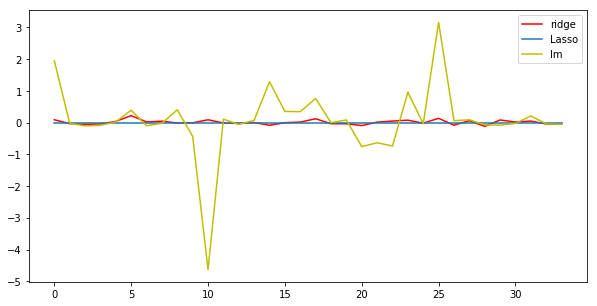

In [232]:
indexs=np.arange(len(lasso_coefficients))


plt.figure(figsize=(10,5))
plt.plot(indexs,ridge_coefficients,color='r',label='ridge')
plt.plot(indexs,lasso_coefficients,label='Lasso')
plt.plot(indexs,lm_coefficients,color='y',label='lm')
plt.legend()

In [233]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
cv_alphas = np.linspace(0.0001, 100, 1000)

find_ridge = RidgeCV(alphas=cv_alphas,scoring='neg_mean_squared_error')
find_ridge.fit(x_train, y_train)
ridge_a_best = find_ridge.alpha_



print('rcv_alpha',ridge_a_best)


ridge_best =Ridge(alpha= ridge_a_best)
ridge_best.fit(x_train, y_train)
ridge_best_pred = ridge_best.predict(x_test)


ridge_best_mse = mean_squared_error(y_test,ridge_best_pred)

print('ridge_mse',ridge_best_mse)

rcv_alpha 0.8009
ridge_mse 0.11358427446317211


In [234]:
find_las=LassoCV(alphas=cv_alphas,max_iter=10000,normalize=True).fit(x_train, y_train)
find_las.fit(x_train,y_train)
las_a_best = find_las.alpha_


print(las_a_best,'Is the optimal alpha value')


las_best=Lasso(las_a_best)
las_best.fit(x_train, y_train)
las_best_pred = las_best.predict(x_test)


las_best_mse = mean_squared_error(y_test,las_best_pred)

print(las_best_mse,'is the mean squared error for lasso')

0.0001 Is the optimal alpha value
0.09982765163166696 is the mean squared error for lasso


/Users/nathancarrizales-duarte/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


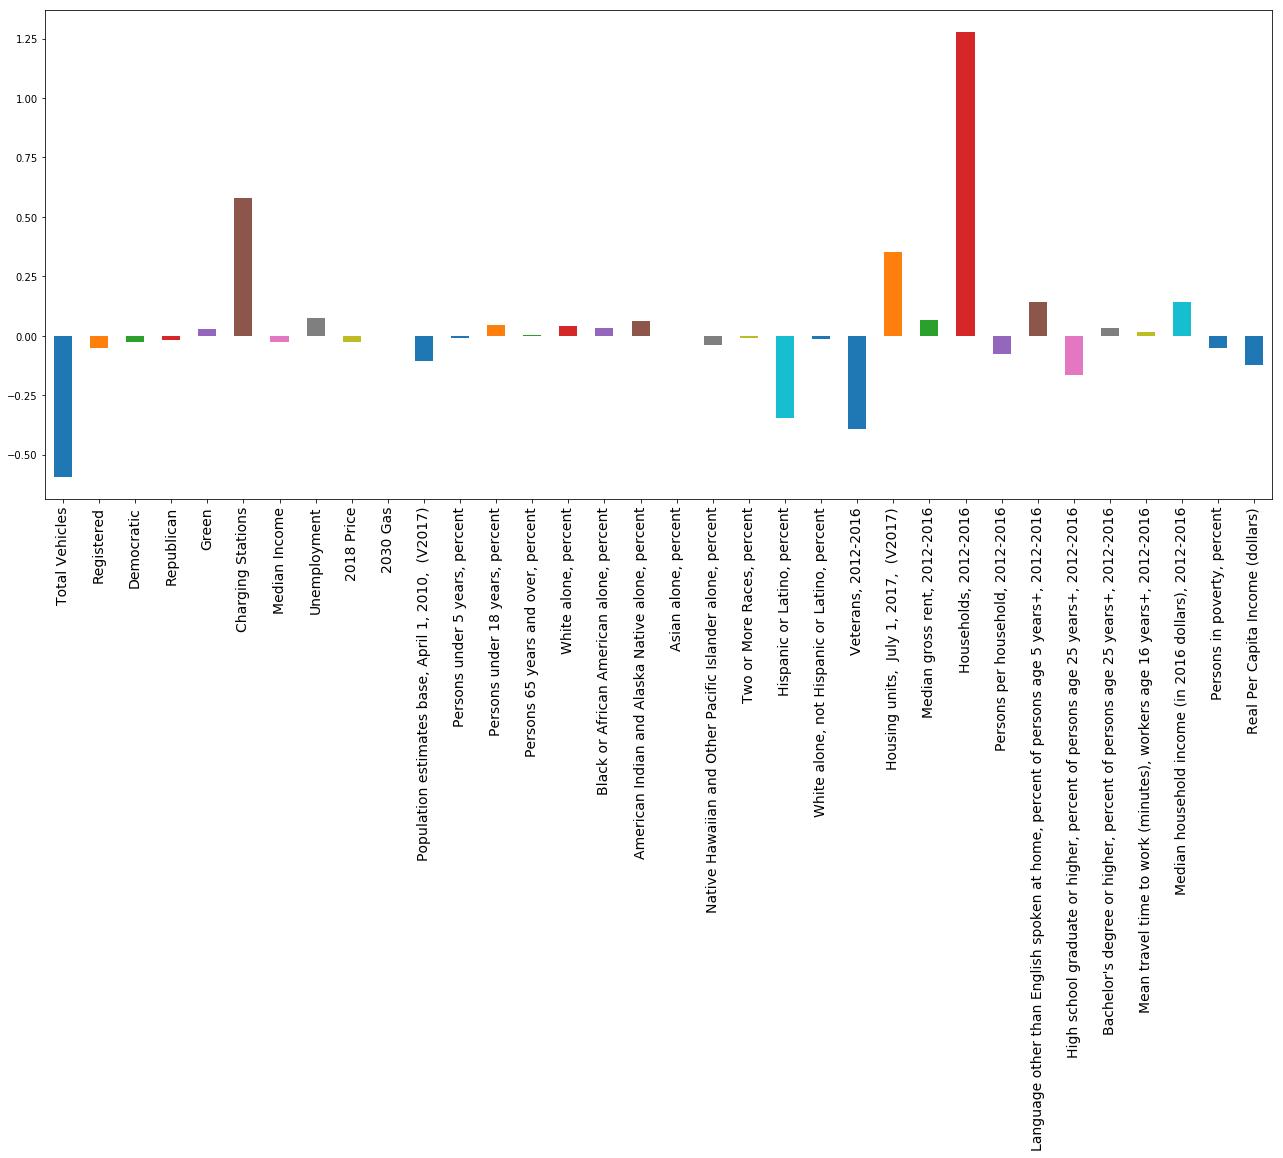

In [235]:
lasso.coef_= las_best.coef_
l_coefs = pd.Series(lasso.coef_, x_all.columns)
plt.figure(figsize=(22, 9))
plt.tick_params(axis='x', labelsize=14)
l_coefs.plot('bar');

In [236]:
compare=pd.DataFrame()
compare['EV actual']=y_test
compare['Linear Regression']=lm.predict(x_test)
compare['Ridge']=ridge_best_pred
compare['Lasso']=las_best_pred

compare



,EV actual,Linear Regression,Ridge,Lasso
32,0.358565,0.467793,0.507458,0.575321
2,-0.406551,-0.395826,-0.342052,-0.329765
27,-0.321398,-0.249477,-0.136412,-0.123593
56,-0.306292,-0.541051,-0.086543,-0.297689
37,0.181864,0.554243,1.126469,1.041713
33,0.118913,0.632213,0.408537,0.502058
51,-0.409010,-0.372906,-0.564112,-0.497594
44,-0.389198,-0.328197,-0.485395,-0.418578
34,-0.388706,-0.621711,-0.679578,-0.716695
20,-0.040574,-0.438232,-0.076702,-0.076287


In [237]:
EV_std=np.std(merge_all['EV'])
EV_mean=np.mean(merge_all['EV'])

def non_standardize_columns(data):
    '''
    Input:
      data (data frame): contains only numeric columns
    Output:
      data frame, the same data, except each column is standardized 
      to have 0-mean and unit variance
    '''
    norm_df = pd.DataFrame() 
    
    for i in data.columns:
        column=data[i]
        
        
        

        norm_df[i]=(column*EV_std+EV_mean)
        
    
    return norm_df


non_standardize_columns(compare)


,EV actual,Linear Regression,Ridge,Lasso
32,10999.0,12553.663187,13118.211368,14084.113741
2,109.0,261.656890,1027.029178,1201.913862
27,1321.0,2344.659834,3953.928432,4136.386395
56,1536.0,-1805.352810,4663.716377,1658.454075
37,8484.0,13784.113557,21928.690359,20722.338220
33,7588.0,14893.868950,11710.259567,13041.354168
51,74.0,587.874947,-2133.575306,-1186.815960
44,356.0,1224.231007,-1013.189170,-62.171002
34,363.0,-2953.389039,-3777.028703,-4305.317262
20,5318.0,-341.911680,4803.791892,4809.690477


In [238]:
print('MSE lm',lm_mse)
print('MSE Lasso',las_best_mse)
print('MSE Ridge',ridge_best_mse)

MSE lm 0.0629692283334146
MSE Lasso 0.09982765163166696
MSE Ridge 0.11358427446317211
